## Data Analysis on McDonald's menu nutrition. Data set has been derived from Kaggle @ https://www.kaggle.com/mcdonalds/nutrition-facts/data

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [4]:
# read the McDonald's Nutrition csv
menu = pd.read_csv('https://s3.amazonaws.com/stkaggle/mcdonald-smenu.csv')

In [5]:
#Lets see the first few rows
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [4]:
# Lets see the Shape before making any changes to Data
menu.shape

(260, 24)

#### We need to clean the Serving Size column data. The Serving Size will have the oz and will add a new column for 'g'

In [6]:
# Creating a new column from existing Serving Size column 'fl oz' if the Serving Size contains fl oz
menu['Fl oz'] = menu[menu['Serving Size'].str.contains('fl oz')]['Serving Size'].apply(lambda x:x.split(' ')[0])
# Creating a new column from existing servcing size column if it's oz and g
menu['Oz'] = menu[menu['Serving Size'].str.contains('oz' and 'g')]['Serving Size'].apply(lambda x:float(x.split(' ')[0]))
#creating a new column for the count Serving Size
menu['Count'] = menu[menu['Serving Size'].str.contains('cookie')]['Serving Size'].apply(lambda x:x.split(' ')[0])


#### Lets see how the records looks now. There should be new columns added for 'fl oz','oz' and 'count'

In [6]:
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Fl oz,Oz,Count
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,17,3,17,10,0,25,15,NaN,4.8,NaN
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,17,3,18,6,0,25,8,NaN,4.8,NaN
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,17,2,14,8,0,25,10,NaN,3.9,NaN
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,17,2,21,15,0,30,15,NaN,5.7,NaN
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,17,2,21,6,0,25,10,NaN,5.7,NaN


In [7]:
# Now verify the Shape again after adding the new columns
menu.shape

(260, 27)

The column count has been changes from 24 to 27

### Lets findout what are the menu categories available and their total count.

Text(0,0.5,'Count')

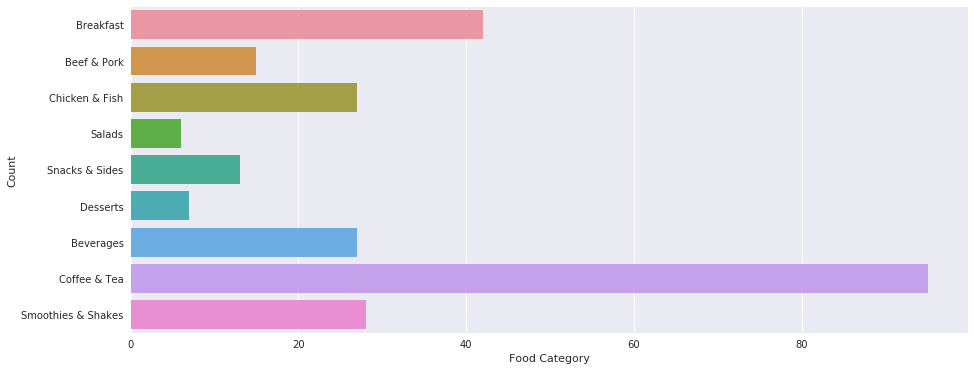

In [8]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,6))
sns.countplot(y='Category',data=menu)
plt.xlabel("Food Category")
plt.ylabel("Count")

It looks like 'Cofee & Tea' has highest number of items compare to other categories

### Lets findout how the calories is distributed across all items.

Text(0.5,0,'Calories')

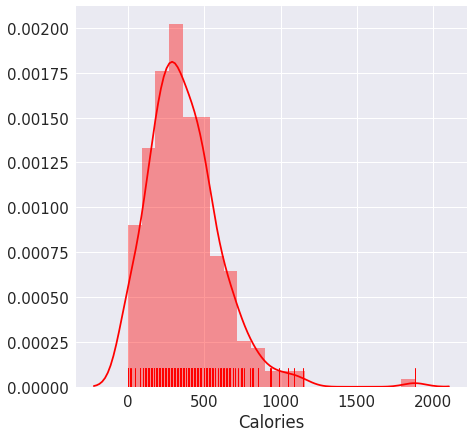

In [49]:
plt.figure(figsize=(7,7))
sns.set(font_scale=1.5)
sns.distplot(menu['Calories'],color='r',rug=True)
plt.xlabel('Calories')

Seems most of the items is less than 700 calories and one is >1500 Calories. Lets findout next.

### Findout the Calories distribution with kde

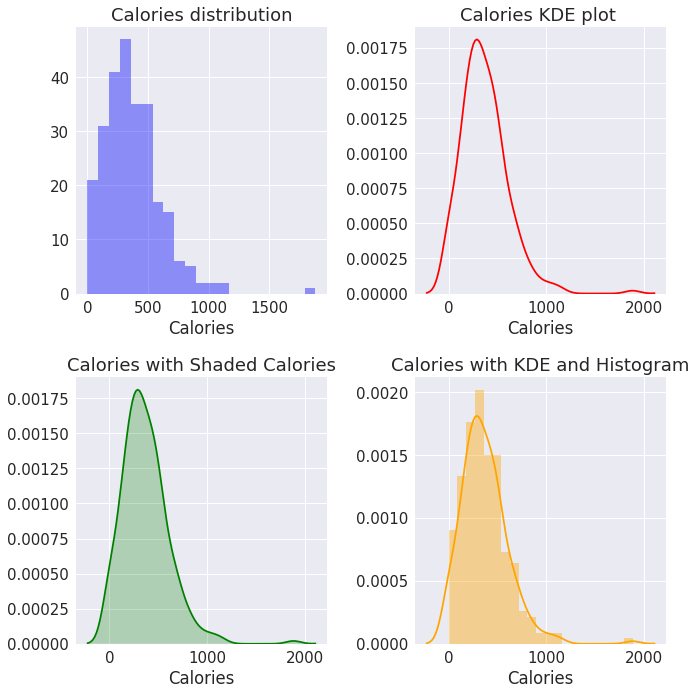

In [50]:
f, axes = plt.subplots(2,2,figsize=(10,10))
ax1 = sns.distplot(menu['Calories'],ax=axes[0,0],color='b',kde=False)
ax1.set_title('Calories distribution') 
ax2 = sns.distplot(menu['Calories'],ax=axes[0,1],hist=False,color='r')
ax2.set_title('Calories KDE plot ')
ax3 = sns.distplot(menu['Calories'],ax=axes[1,0],hist=False,color='g',kde_kws={'shade':True})
ax3.set_title('Calories with Shaded Calories')
ax4 = sns.distplot(menu['Calories'],ax=axes[1,1],color='Orange')
ax4.set_title('Calories with KDE and Histogram')
plt.tight_layout()
#ignoring the error on VisibleDeprecationWarning
warnings.filterwarnings("ignore",category=np.VisibleDeprecationWarning)

### Finding the calories range across all foods.

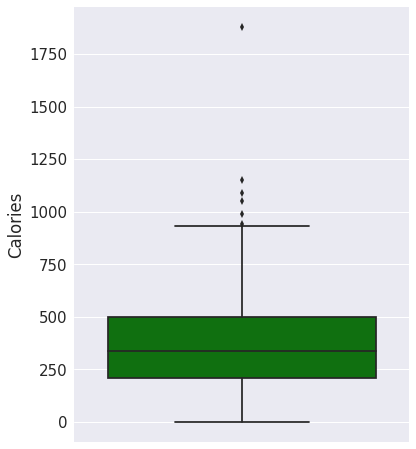

In [11]:
plt.figure(figsize=(6,8))
sns.boxplot(menu['Calories'],orient='v',color='g')

The median calories is around 300.

#### This is a swarmplot to visualize the data point location inside Quartiles

Text(0,0.5,'Calories')

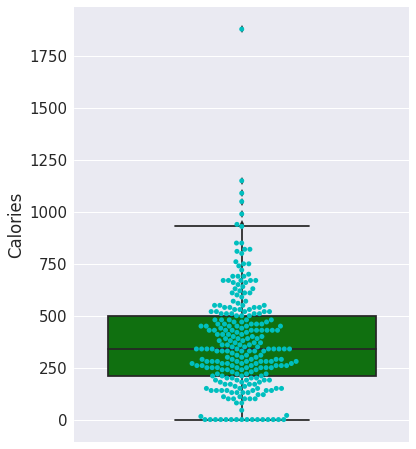

In [12]:
plt.figure(figsize=(6,8))
# Draw the box plot for Calories
sns.boxplot(menu['Calories'],orient='v',color='g')
ax1 = sns.swarmplot(menu['Calories'],orient='v',color='c')
ax1.set_ylabel('Calories')

### Lets findout what's the median calories across all different food categories and figure out if there is any outlier.

[Text(0,0,'Breakfast'),
 Text(0,0,'Beef & Pork'),
 Text(0,0,'Chicken & Fish'),
 Text(0,0,'Salads'),
 Text(0,0,'Snacks & Sides'),
 Text(0,0,'Desserts'),
 Text(0,0,'Beverages'),
 Text(0,0,'Coffee & Tea'),
 Text(0,0,'Smoothies & Shakes')]

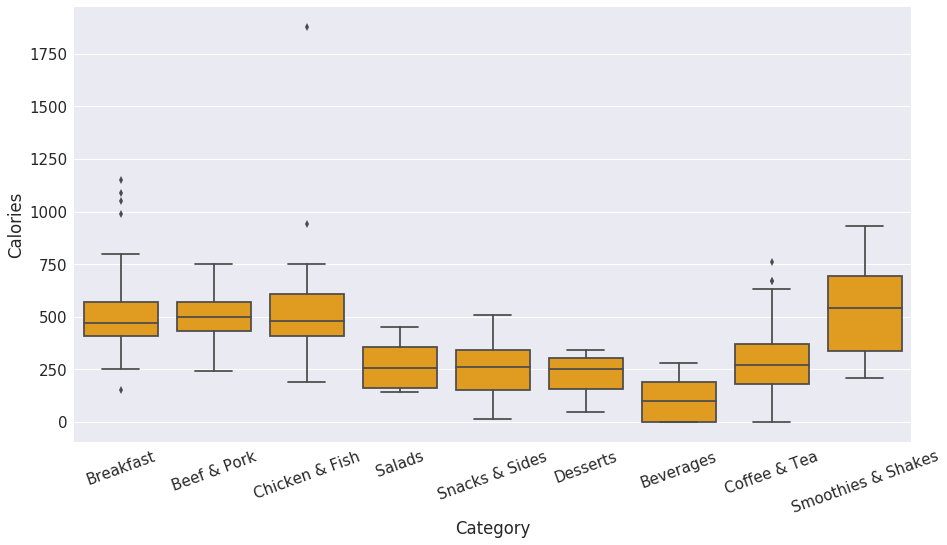

In [13]:
#setting for thr canvas size
plt.figure(figsize=(15,8))
fig = sns.boxplot(x='Category',y='Calories',data=menu,orient='v',color='Orange')
# settings for label text rotation
fig.set_xticklabels(fig.get_xticklabels(),rotation=20)

### Lets findout how calories distributes across 9 different categories.  This will help us to identify which food category has less calories compare to others.

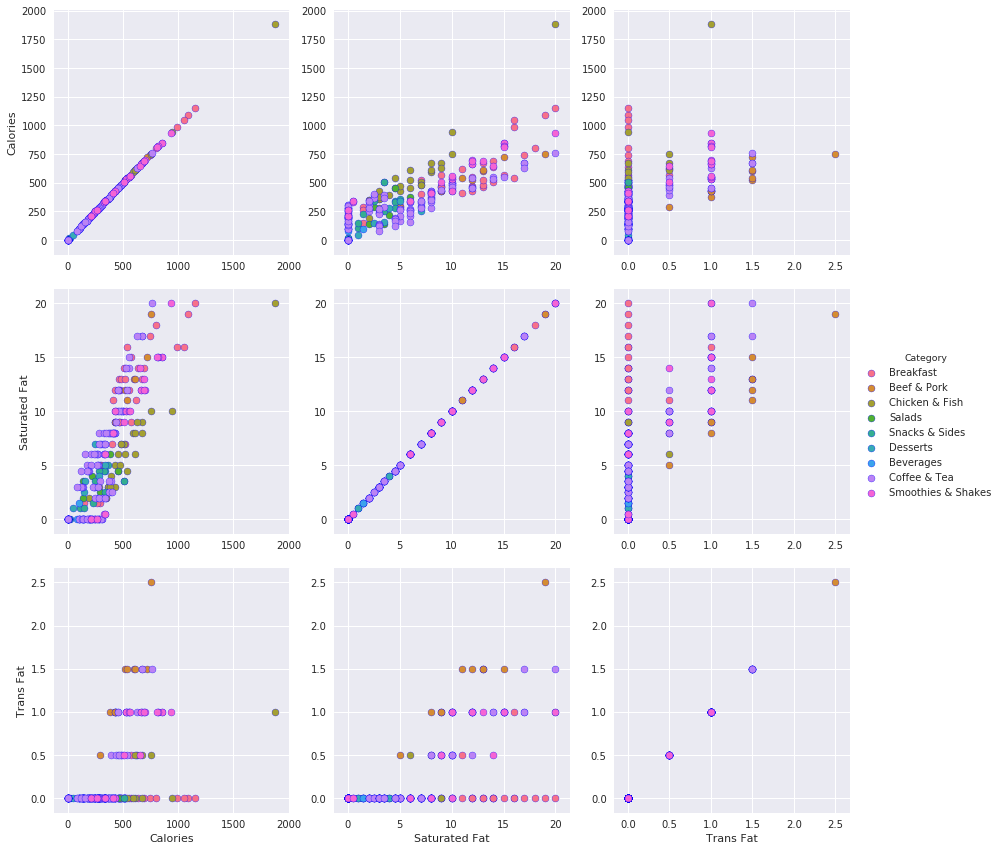

In [14]:
sns.set()
# plotting a pairgrid on Calories, Saturated Fat and Trans Fat, against all the categories via hue attribue
ax = sns.PairGrid(data=menu,vars=['Calories','Saturated Fat','Trans Fat'],
                  hue='Category',size=4,palette='husl')
ax.map(plt.scatter,edgecolor='b')
ax.add_legend()

#### The content of Total Fat and Saturated Fat on every category and their ratio of growth.

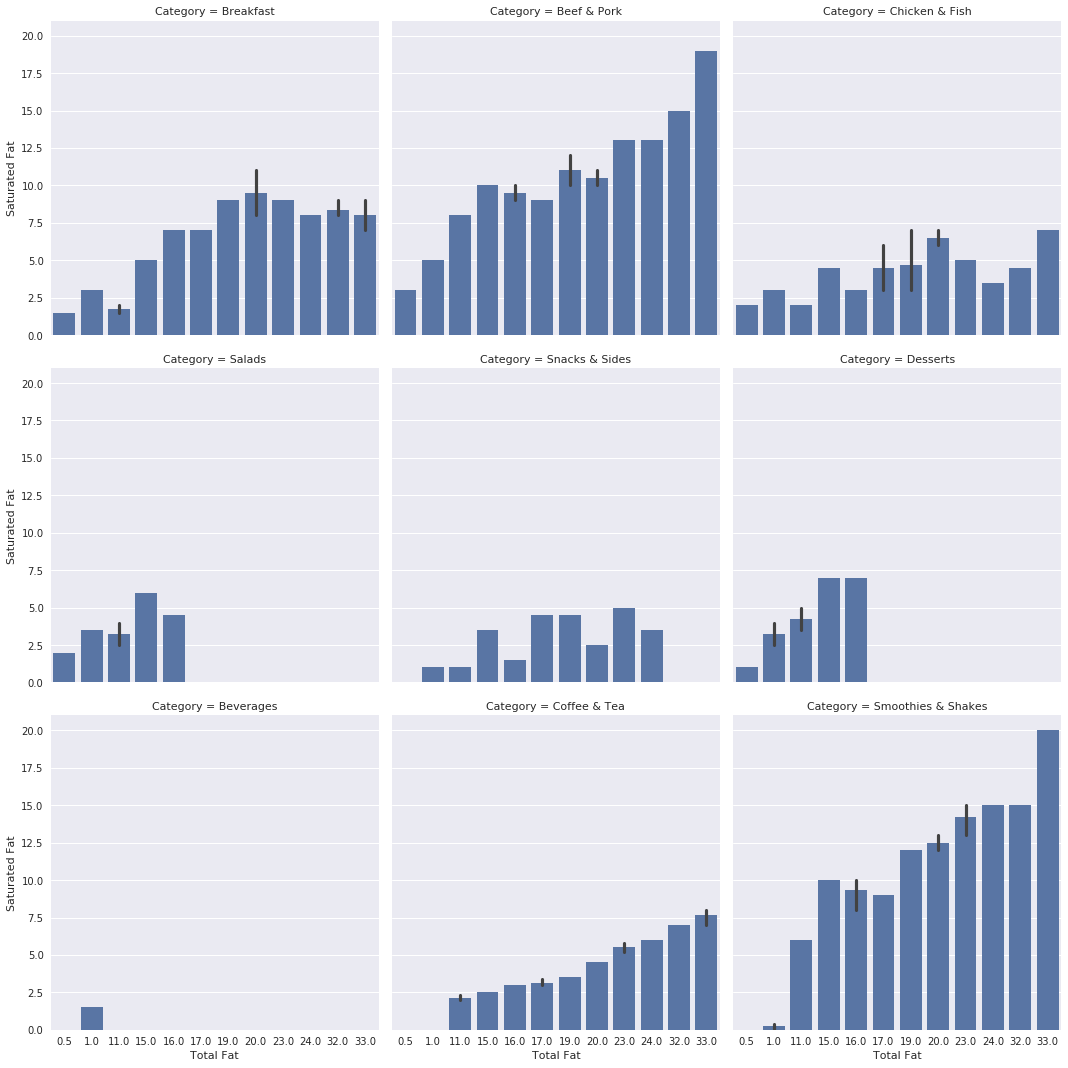

In [46]:
g = sns.FacetGrid(data=menu,col='Category',size=5,col_wrap=3)
g.map(sns.barplot,'Total Fat','Saturated Fat')